# Carga de datos

In [1]:
import os

# URL del archivo en GitHub
url_archivo_github = 'https://raw.githubusercontent.com/SekDak12/Proyecto-Ciencia/main/2023%20QS.csv'

# Ruta donde se guardará el archivo descargado
ruta_guardado = '2023 QS.csv'

# Comando para descargar usando wget
comando_wget = f'wget {url_archivo_github} '

# Ejecutar el comando para descargar
os.system(comando_wget)

0

In [2]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

df = pd.read_csv ("2023 QS.csv")
df

df1 = pd.read_csv ("2023 QS.csv")


# Limpieza nueva

In [3]:
##
## Nueva Limpieza
##

df1= df.drop("ar rank", axis=1)
df2= df1.drop("er rank", axis=1)
df3= df2.drop("fsr rank", axis=1)
df4= df3.drop("cpf rank", axis=1)
df5= df4.drop("ifr rank", axis=1)
df6= df5.drop("irn rank", axis=1)
df7= df6.drop("isr rank", axis=1)
dfclean= df7.drop("ger rank", axis=1)


dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,100
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,98.8
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,98.4
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.7,NaN,8.1,NaN,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.2,2.8,51.1,NaN,-
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,NaN,NaN,7.5,8.7,-


In [4]:
valor_a_contar = "-"
conteo = (df['score scaled'] == valor_a_contar).sum()
print(conteo)



922


In [5]:
#Vamos a tratar de eliminar un inconveniente con el dato df['score scaled'] = df['score scaled'].astype(float) ya que, este dato oriinalmente
#Se trata de un sting con elements - que seran reemplados y el dominio del resto de datos es de  24.2 a 100, estos se reemplazaran con 0

dfclean['score scaled'] = dfclean["score scaled"].replace(["-"],[0] )
dfclean['score scaled'] = dfclean['score scaled'].astype(float)

##
## Se arreglo dicho error creando un modelo de regresion en las secciones adelante
##

In [6]:
dfclean.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
er score          1
fsr score         2
cpf score         5
ifr score        98
isr score        57
irn score        13
ger score        12
score scaled      0
dtype: int64

In [7]:
#Los NaN en er score, fsr score, cpf score al contar con una menor cantidad de NaNs se reemplazaran como 0.

dfclean['er score'].fillna(0, inplace=True)
dfclean['fsr score'].fillna(0, inplace=True)
dfclean['cpf score'].fillna(0, inplace=True)

#Los Nan con respecto a ifr, isr, irn seran transformados por las media de sus datos, ya que estos se encuentran
#Relacionados con la falta de informacion de la colaboraciones internacionales de las universidades

media_ifr = dfclean['ifr score'].mean()
dfclean['ifr score'].fillna(media_ifr, inplace=True)

media_isr = dfclean['isr score'].mean()
dfclean['isr score'].fillna(media_isr, inplace=True)

media_irn = dfclean['irn score'].mean()
dfclean['irn score'].fillna(media_irn, inplace=True)

media_ger = dfclean['ger score'].mean()
dfclean['ger score'].fillna(media_ger, inplace=True)

In [8]:
dfclean.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,711.500000,20.124684,20.642616,29.954923,24.443108,31.659517,26.545348,49.570121,26.186809,15.688959
std,410.640354,22.802706,24.025717,28.174827,27.899638,32.971465,30.270835,30.066955,26.090171,24.008663
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,356.250000,5.400000,4.400000,8.200000,3.000000,5.200000,3.400000,21.900000,6.800000,0.000000
50%,711.500000,10.800000,10.250000,18.200000,10.950000,16.650000,12.350000,48.900000,15.700000,0.000000
75%,1066.750000,23.775000,26.950000,43.475000,39.200000,48.975000,38.625000,77.375000,36.300000,30.700000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Seccion de graficacion

<ipython-input-11-2d752970c03b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfclean.corr()


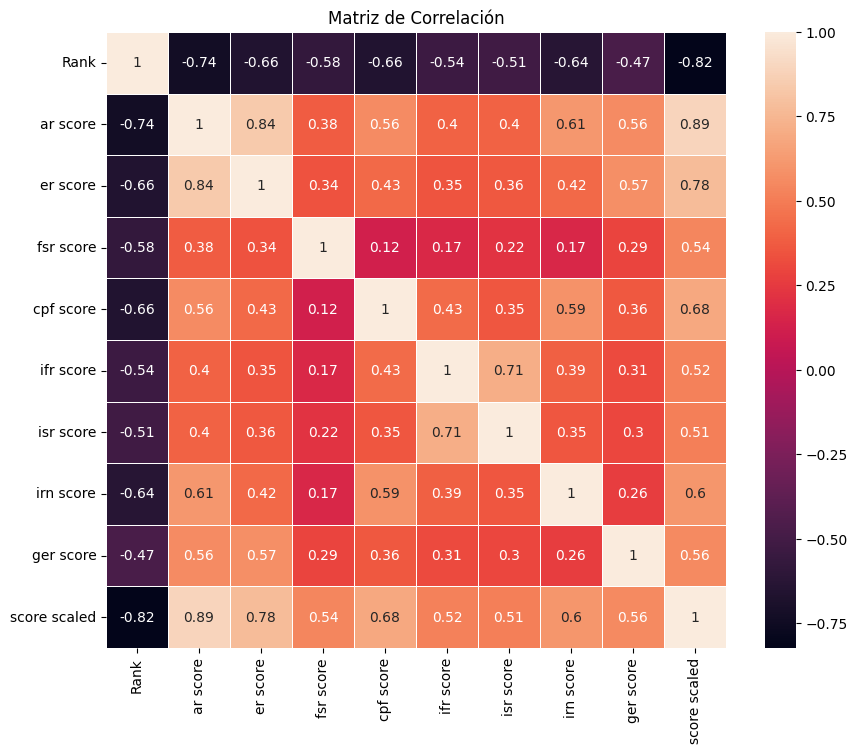

In [11]:
# Calcula la matriz de correlación
correlation_matrix = dfclean.corr()

# Visualiza la  matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

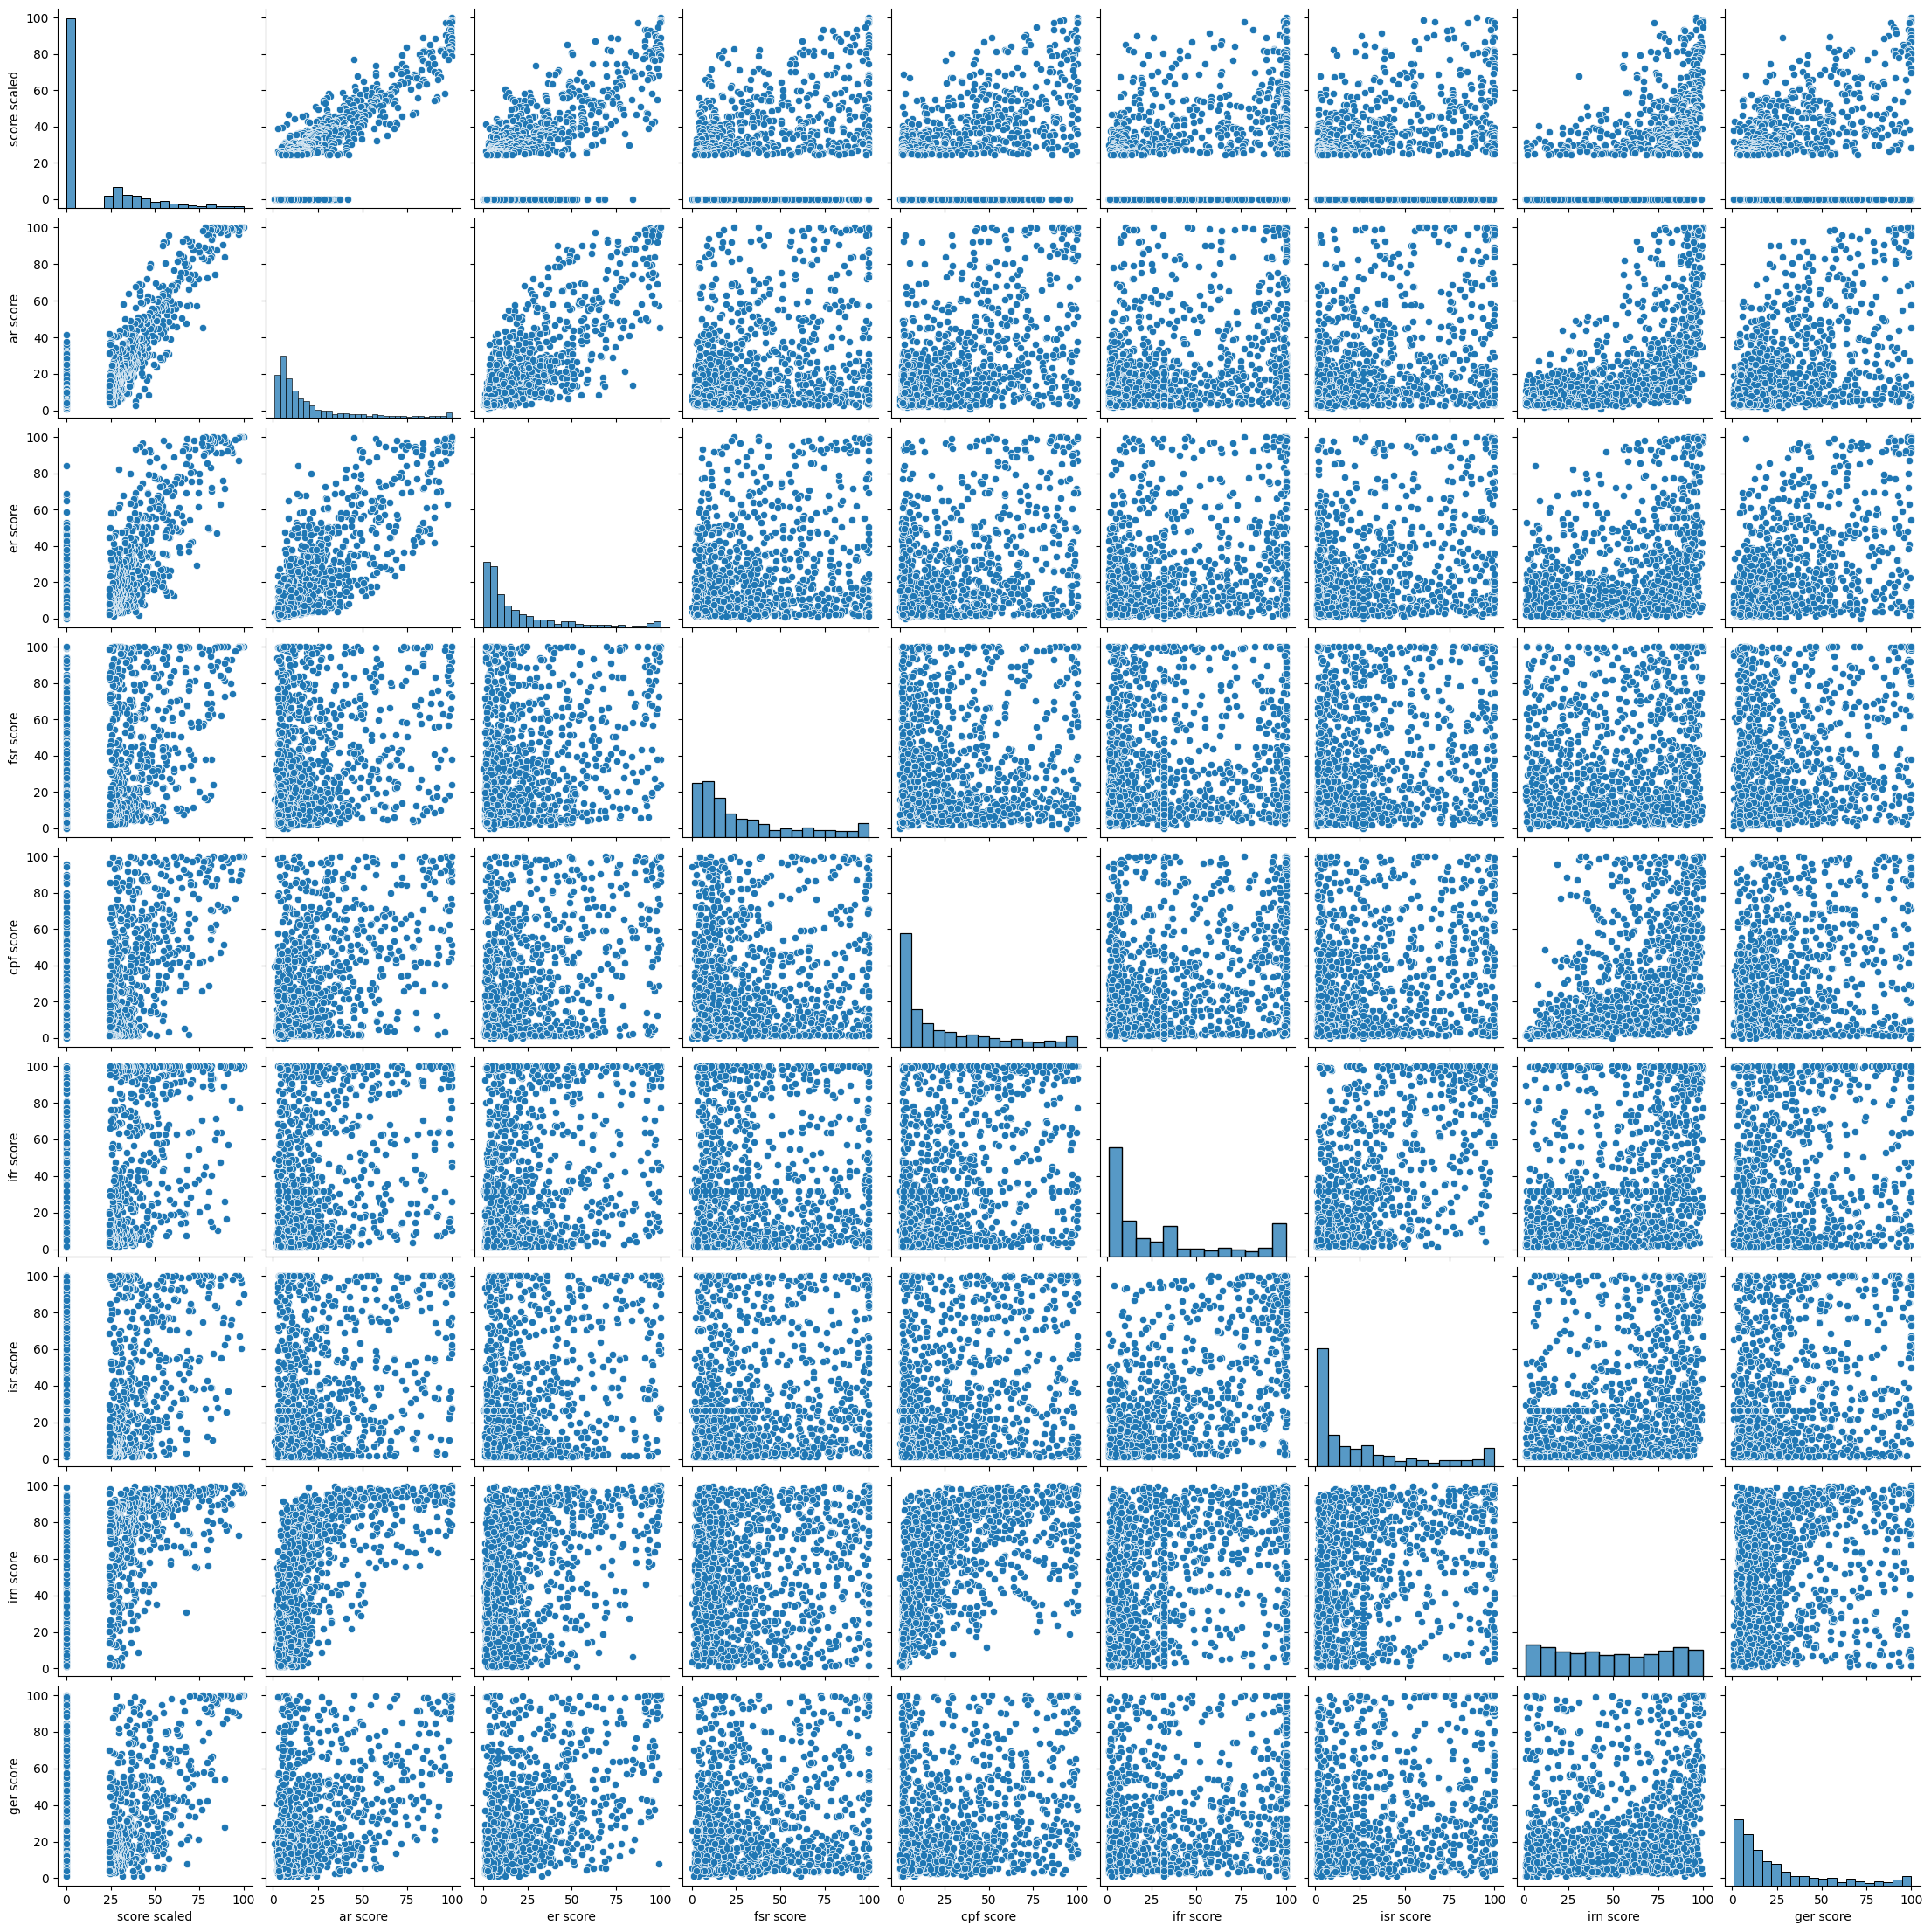

In [12]:
sns.pairplot(dfclean, vars = ['score scaled','ar score', 'er score','fsr score','cpf score','ifr score','isr score','irn score','ger score' ], kind= "scatter" )

# Creador de modelo de regresion lineal  para solucion de problemas con
# el Score Scaled.

# Score scaled.

In [21]:
dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,100.0
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,98.8
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,98.4
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,0.0
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,0.0
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,0.0
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,0.0


In [ ]:
# Separar la variable objetivo 'Rank'
y =dfclean['score scaled']
# Seleccionar todas las columnas excepto 'Rank' como características
##X = df[['ar score','ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score', 'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank', 'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled']]
X2 = dfclean.drop('institution', axis=1)

X3 = X2.drop('location', axis=1)
X4 = X3.drop('location code', axis=1)
#X5 = X4.drop('label', axis=1)
#X6 = X5.drop('clasificacion', axis=1)

X = X4.drop('Rank', axis=1)
#X = X.drop('score scaled 2.0', axis=1)
X = X.drop("score scaled", axis=1)
X.shape, y.shape
X


t = []



In [37]:
## Solucion creando de manera manual la ecuacion de la regresion lineal
## Decidi basarme en los valores de nuestra matriz de covarianza y luego de esto
## aplicar un reescalamiento del dominio a [0,1]

ar = dfclean["ar score"]
ger = dfclean['ger score']
irn = dfclean['irn score']
er = dfclean['er score']
cpf = dfclean['cpf score']
fsr = dfclean['fsr score']
ifr = dfclean['ifr score']
isr = dfclean['isr score']

#def regresion(ar, ger, irn, er, cpf, fsr, ifr, isr):
# return .89*ar+.56*ger+.6*irn+.78*er+.68*cpf+.54*fsr+.52*ifr+.51*isr

def regresion(ar, ger, irn, er, cpf, fsr, ifr, isr):
    # Los pesos corresponden a las correlaciones dadas en la matriz de correlacion
    pesos = [0.89, 0.56, 0.6, 0.78, 0.68, 0.54, 0.52, 0.51]
    puntajes = [ar, ger, irn, er, cpf, fsr, ifr, isr]

    # Multiplica cada puntaje por su respectivo peso y suma estos productos
    return sum(peso * puntaje for peso, puntaje in zip(pesos, puntajes))

rango = len(dfclean['Rank'])
print(rango)

t = []
i = 1
for i in range(rango):
  x = regresion(dfclean.iloc[i]['ar score'], dfclean.iloc[i]['ger score'], dfclean.iloc[i]['irn score'], dfclean.iloc[i]['er score'],
                dfclean.iloc[i]['cpf score'], dfclean.iloc[i]['fsr score'], dfclean.iloc[i]['ifr score'], dfclean.iloc[i]['isr score'])

  t.append(x)



# Definir la función sigmoide para mapear a [0, 1]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Escalar y desplazar para obtener [0, 100]
def scale_to_0_100(x):
    return x * 100


def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)



1422


In [44]:
# Calcular el valor mínimo y máximo de la lista original
min_value = min(t)
max_value = max(t)



In [48]:


# Normalizar cada valor en la lista original
normaliza = [normalize(value, min_value, max_value) for value in t]

#sig = []
#scale = []


#for i in range(rango):
#  sig.append(sigmoid(t[i]))



#for i in range(rango):
#  scale.append(scale_to_0_100(sig[i]))



#dfclean['score_scaled_sigmoid'] =

# Calcular los puntajes escalados utilizando la función sigmoide y luego escalar a [0, 100]
dfclean['score_scaled_sigmoid'] = [scale_to_0_100(score) for score in normaliza]



In [49]:
dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled,score_scaled_sigmoid
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,100.0,99.996500
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,98.8,100.000000
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,98.5,96.867699
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,98.4,99.819464
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,97.6,95.513579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,0.0,6.255698
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,0.0,4.790058
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,0.0,8.924386
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,0.0,6.532231


In [ ]:
##  Haciendo el score scaled mas fino mediante un model des
##                  Arboles de decision
##
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(max_depth=12, random_state=0)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba y guardar las predicciones
y_pred_rf = rf_model.predict(X)

# Evaluar el modelo de Random Forest en el conjunto de prueba y obtener la puntuación
score_rf = rf_model.score(X_test, y_test)

# Imprimir las puntuaciones
print("Puntuación del modelo de Random Forest en el conjunto de prueba:", score_rf)

# Agregar las predicciones como nuevas columnas en el DataFrame
dfclean['score scaled 2.0'] = y_pred_rf


Puntuación del modelo de Random Forest en el conjunto de prueba: 0.9433323559869756


In [65]:
dfclean2.isnull().sum()

ar score                0
er score                0
fsr score               0
cpf score               0
ifr score               0
isr score               0
irn score               0
ger score               0
score_scaled_sigmoid    0
dtype: int64

# Analisis de Maquinas de vectores de soporte

In [68]:
dfclean1 = dfclean.drop("score scaled", axis =1 )

In [70]:
dfclean1

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score_scaled_sigmoid
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,99.996500
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,100.000000
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,96.867699
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,99.819464
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,95.513579
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,6.255698
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,4.790058
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,8.924386
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,6.532231


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos y realizar preprocesamiento básico si es necesario
# Suponiendo que tienes un DataFrame df con tus datos
# ...

# Definir intervalos y etiquetas
intervalos = [0, 20, 50, 80, 100]  # Define tus intervalos según tus criterios
etiquetas = ['malo', 'regular', 'bueno', 'excelente']  # Define las etiquetas para cada intervalo

# Crear la variable objetivo basada en los intervalos
dfclean1['clasificacion'] = pd.cut(dfclean1['score_scaled_sigmoid'], bins=intervalos, labels=etiquetas)

# Codificar la variable objetivo ('clasificacion')
le = LabelEncoder()
dfclean1['label'] = le.fit_transform(dfclean1['clasificacion'])

# Definir las características y la variable objetivo
X = dfclean1[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score', 'ger score']]
y = dfclean1['label']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
svm = SVC(kernel='linear')  # Puedes elegir el kernel adecuado según tu problema
svm.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión: 0.9964912280701754
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         5
           2       0.99      1.00      1.00       125
           3       1.00      1.00      1.00       124
           4       0.00      0.00      0.00         1

    accuracy                           1.00       285
   macro avg       0.80      0.80      0.80       285
weighted avg       0.99      1.00      0.99       285

Matriz de confusión:
[[ 30   0   0   0   0]
 [  0   5   0   0   0]
 [  0   0 125   0   0]
 [  0   0   0 124   0]
 [  0   0   1   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Analisis Respecto a Mexico

In [74]:
mx = dfclean1[dfclean['location'] == 'Mexico']
mx


,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score_scaled_sigmoid,clasificacion,label
104,105,Universidad Nacional Autónoma de México (UNAM),MX,Mexico,96.0,95.1,43.2,2.9,9.300000,2.600000,91.3,61.5,54.654708,bueno,0
169,170,Tecnológico de Monterrey,MX,Mexico,48.8,92.8,72.9,2.2,52.900000,8.600000,65.1,85.6,53.680598,bueno,0
401,402,Colegio de México,MX,Mexico,14.9,3.9,100.0,1.5,10.100000,19.800000,1.7,99.6,26.487256,regular,3
546,547,Universidad Panamericana (UP),MX,Mexico,7.6,29.3,78.2,1.2,12.200000,1.400000,10.8,10.4,15.897006,malo,2
636,637,Universidad Anáhuac México,MX,Mexico,11.8,33.1,55.3,1.1,6.500000,3.500000,2.4,36.1,16.252519,malo,2
730,731,Universidad Iberoamericana IBERO,MX,Mexico,17.5,39.9,29.3,1.3,6.600000,2.600000,7.1,50.0,17.625577,malo,2
764,765,Instituto Politécnico Nacional (IPN),MX,Mexico,20.0,50.9,9.2,2.8,2.900000,1.200000,60.9,9.5,19.258631,malo,2
765,766,Instituto Tecnológico Autónomo de México (ITAM),MX,Mexico,14.2,47.4,11.9,2.0,64.100000,1.700000,5.1,68.7,24.358296,regular,3
784,785,Universidad Autónoma Chapingo,MX,Mexico,3.5,2.5,66.4,1.4,3.100000,1.400000,2.8,7.3,7.239330,malo,2
845,846,"ITESO, Universidad Jesuita de Guadalajara",MX,Mexico,5.7,7.7,44.1,1.0,2.800000,1.600000,2.1,8.5,5.983198,malo,2


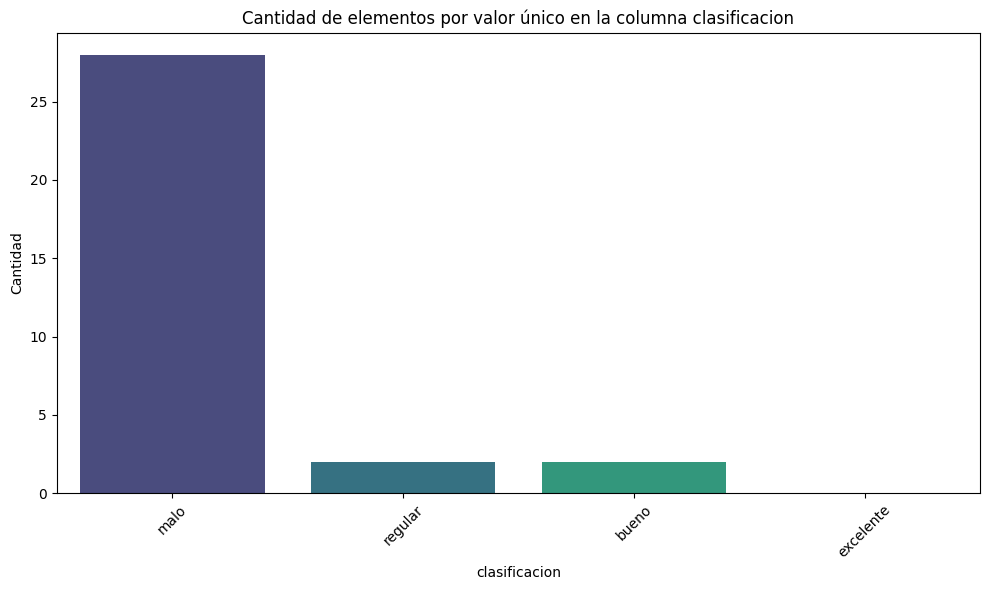

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'mx' es tu DataFrame y 'columna' es la columna que deseas analizar
columna = 'clasificacion'  # Reemplaza 'nombre_de_tu_columna' por el nombre real de tu columna

# Calcula la cantidad de elementos para cada valor único en la columna
conteo_valores = mx[columna].value_counts()

# Crea un gráfico de barras para visualizar los conteos
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_valores.index, y=conteo_valores.values, palette='viridis')
plt.xlabel(columna)
plt.ylabel('Cantidad')
plt.title('Cantidad de elementos por valor único en la columna ' + columna)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

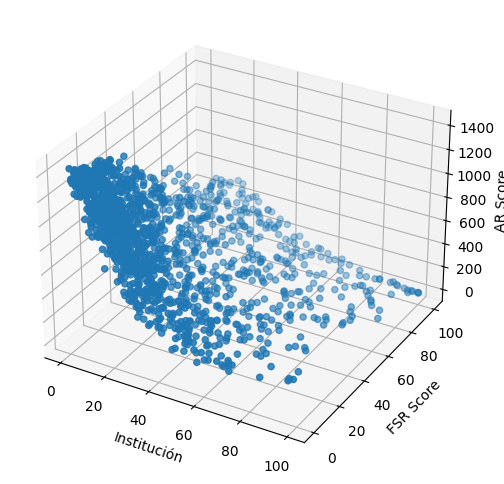

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Obtener los datos de AR Score, FSR Score e Instituciones
ar_scores = dfclean['score_scaled_sigmoid']
fsr_scores = dfclean['fsr score']
instituciones = dfclean['institution']

# Crear una figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Agregar los puntos en el gráfico 3D
ax.scatter(ar_scores, fsr_scores, range(len(instituciones)))

# Etiquetar los ejes
ax.set_zlabel('AR Score')
ax.set_ylabel('FSR Score')
ax.set_xlabel('Institución')

# Mostrar el gráfico
plt.show()

[Text(0, 0, '96'),
 Text(0, 0, '48.8'),
 Text(0, 0, '14.9'),
 Text(0, 0, '7.6'),
 Text(0, 0, '11.8'),
 Text(0, 0, '17.5'),
 Text(0, 0, '20'),
 Text(0, 0, '14.2'),
 Text(0, 0, '3.5'),
 Text(0, 0, '5.7'),
 Text(0, 0, '3.8'),
 Text(0, 0, '21.7'),
 Text(0, 0, '23'),
 Text(0, 0, '20.3'),
 Text(0, 0, '7.5'),
 Text(0, 0, '14.9'),
 Text(0, 0, '3.2'),
 Text(0, 0, '15.2'),
 Text(0, 0, '11.5'),
 Text(0, 0, '7.6'),
 Text(0, 0, '4.4'),
 Text(0, 0, '6.2'),
 Text(0, 0, '4.7'),
 Text(0, 0, '3.6'),
 Text(0, 0, '7.7'),
 Text(0, 0, '4.1'),
 Text(0, 0, '2.9'),
 Text(0, 0, '3.3'),
 Text(0, 0, '4.4'),
 Text(0, 0, '8.7'),
 Text(0, 0, '5.8'),
 Text(0, 0, '3.4')]

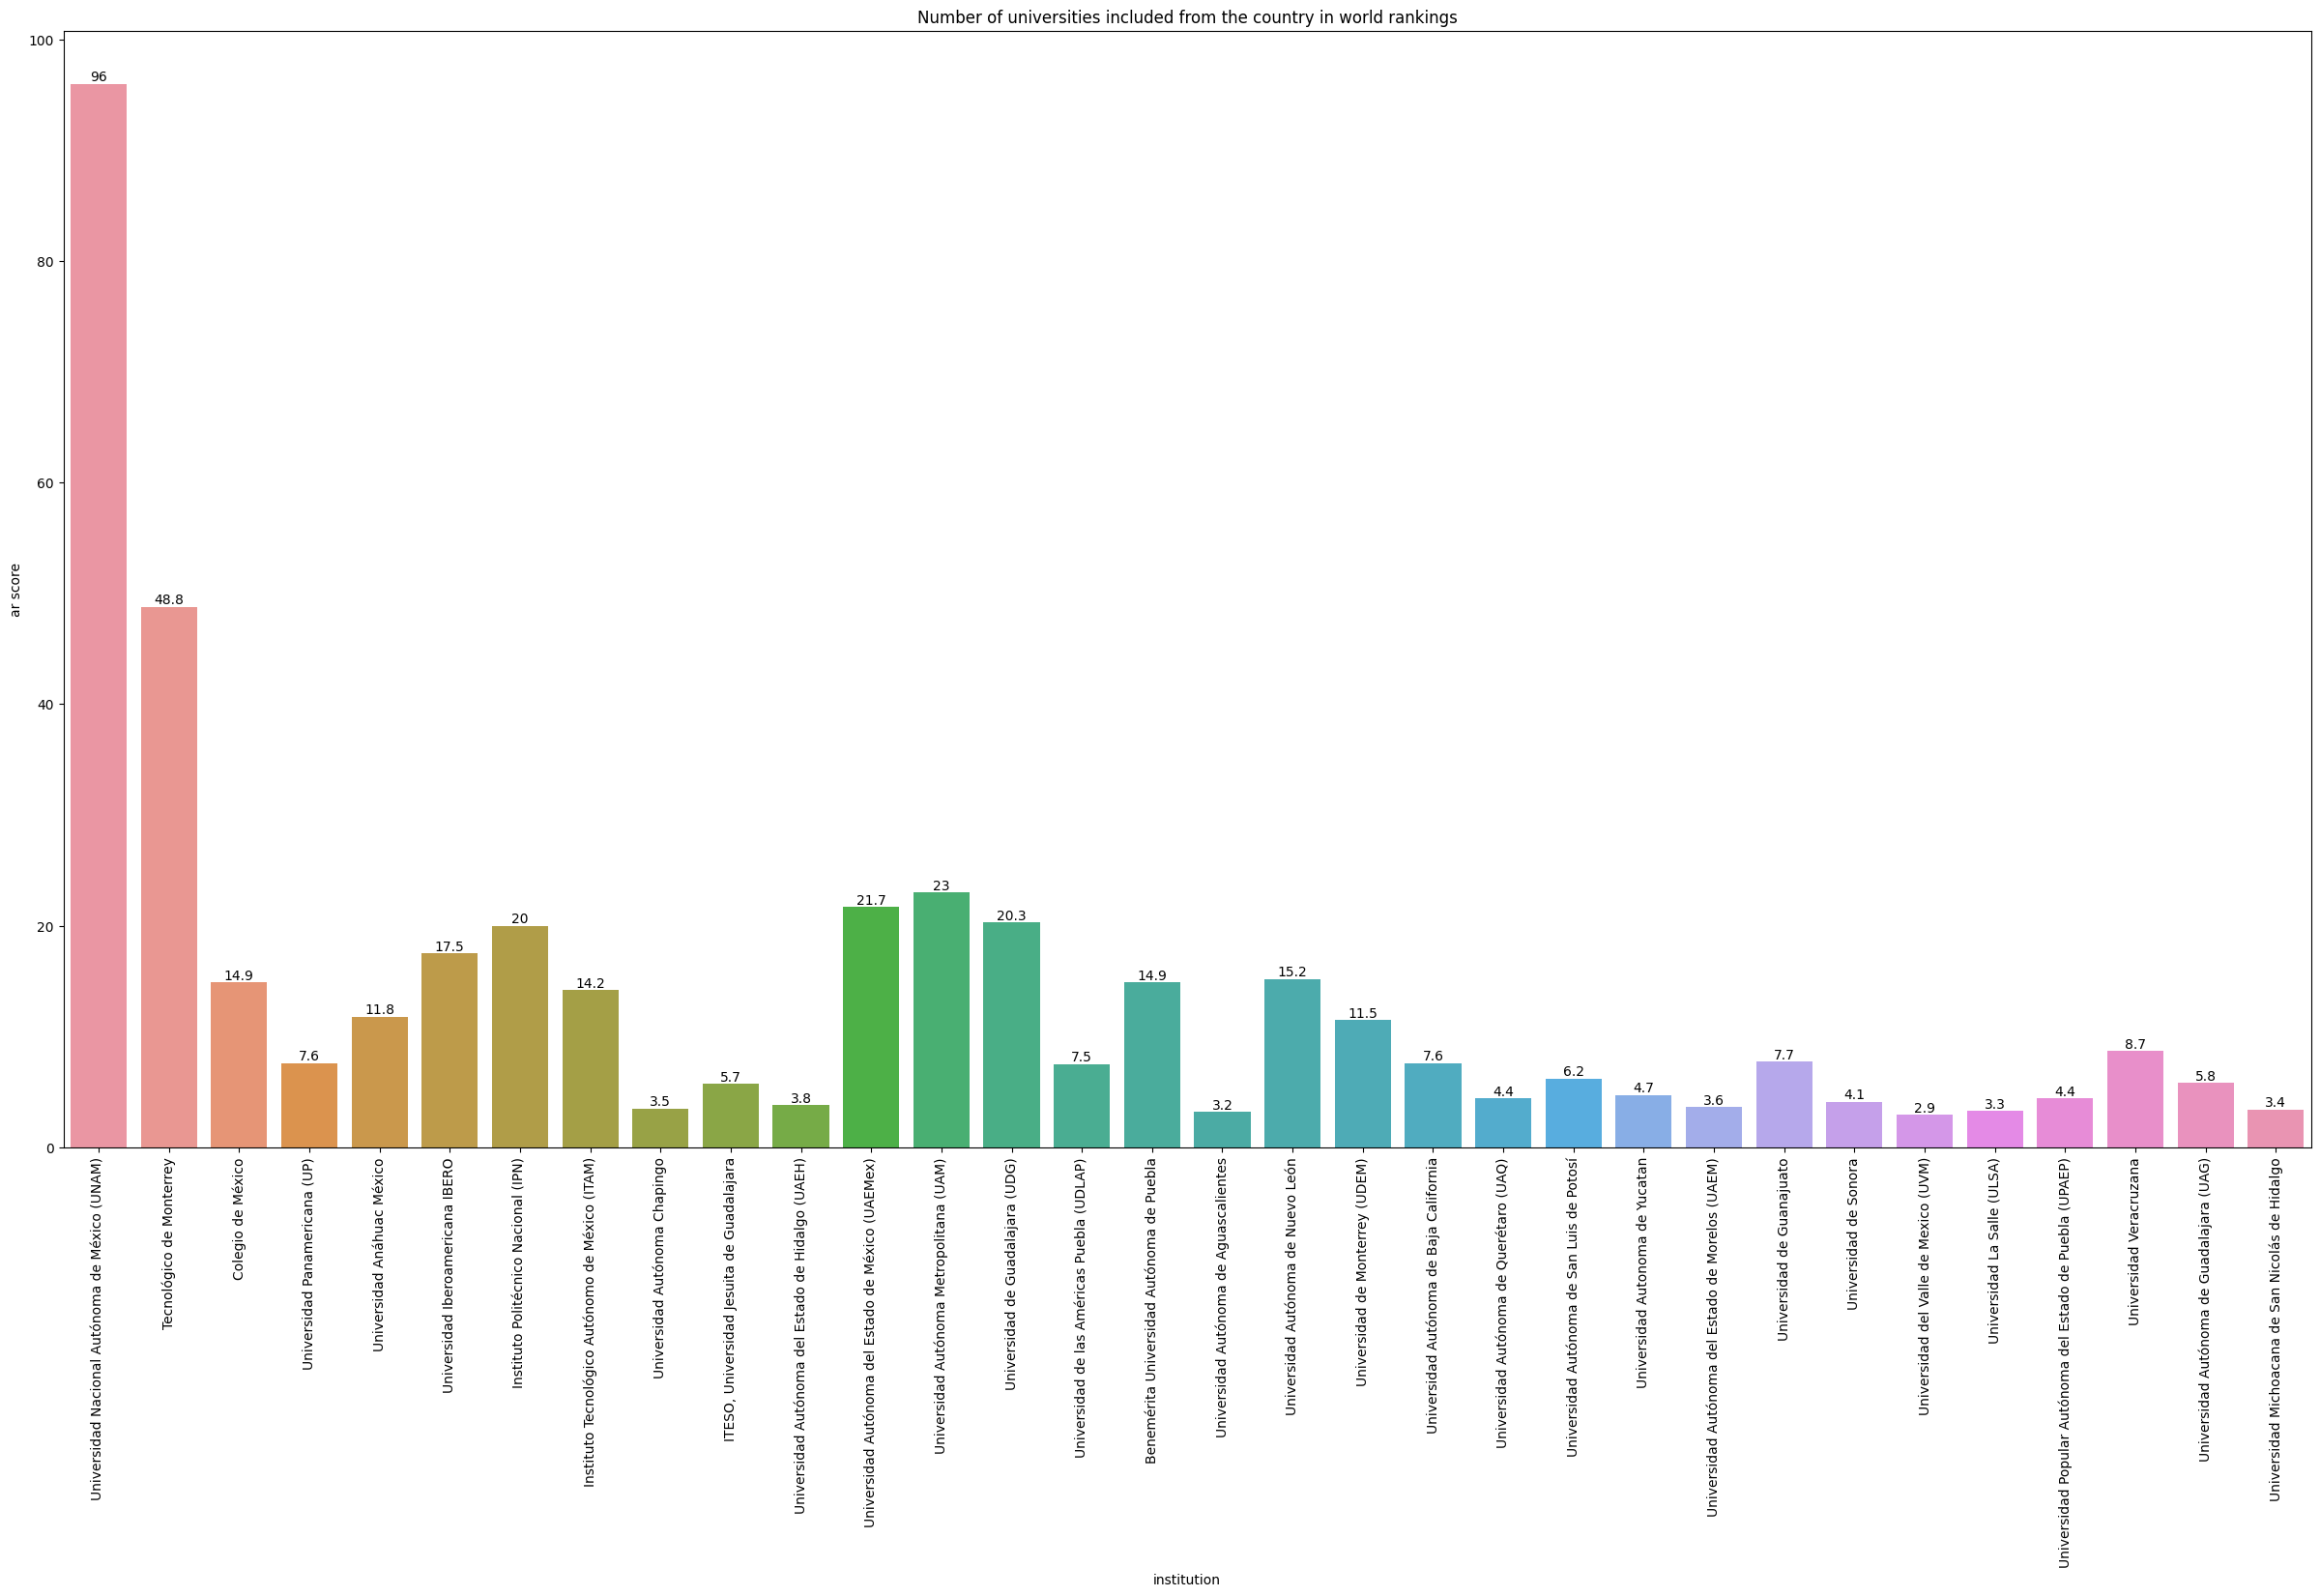

In [77]:


plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.title('Number of universities included from the country in world rankings')
ax = sns.barplot(x='institution', y='ar score',data=mx)
ax.bar_label(ax.containers[0])



# Pendiente, analisis de filter, antes solucionar score scaled.

In [19]:
pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.5 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26054 sha256=e087476e867dd92d680f1b32ab7a44771eb79bcba126eb8c35e1c0e3ce637e04
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depend

In [54]:

#dfclean2 = dfclean2.drop("score scale", axis=1)

#dfclean2 = dfclean.drop("score scaled", axis=1)
#dfclean2 = dfclean2.drop("institution", axis=1)
#dfclean2 = dfclean2.drop("Rank", axis=1)
#dfclean2 = dfclean2.drop("location code", axis=1)
#dfclean2 = dfclean2.drop("location", axis=1)
dfclean2['score_scaled_sigmoid'] = dfclean['score_scaled_sigmoid']
dfclean2

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score_scaled_sigmoid
0,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,99.996500
1,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,100.000000
2,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,96.867699
3,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,99.819464
4,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,95.513579
...,...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,6.255698
1418,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,4.790058
1419,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,8.924386
1420,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,6.532231


In [55]:
from scipy import stats
from fitter import Fitter

# 80 distribuciones
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']
# Atributo
fitter = Fitter(dfclean["score_scaled_sigmoid"], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

fitter.get_best(method = 'sumsquare_error')



{'gamma': {'a': 1.7873865835651155,
  'loc': -0.07187575093690049,
  'scale': 14.599804040494558}}

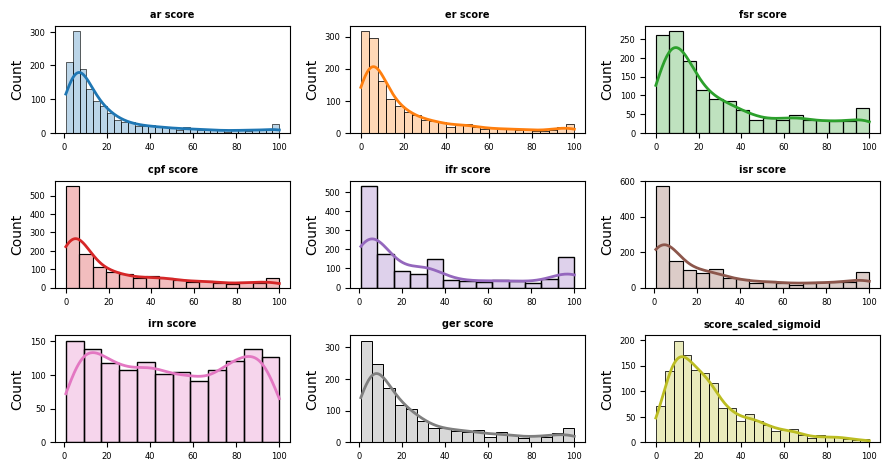

In [59]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
for i, colum in enumerate(dfclean2):
    sns.histplot(
        data     = dfclean,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)



In [60]:
dfclean2


,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score_scaled_sigmoid
0,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,99.996500
1,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,100.000000
2,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,96.867699
3,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,99.819464
4,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,95.513579
...,...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,6.255698
1418,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,4.790058
1419,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,8.924386
1420,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,6.532231


In [62]:
# Buscamos verificar la correccion del BAIS del score scaled, definiendo este nuevo parametro
# en base  al informacion que conocemos, en los scores obtenidoos basados en su covarianza con
# el score scaled original propio del dataset dfclean.

dfclean2.describe()



,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score_scaled_sigmoid
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,20.124684,20.642616,29.954923,24.443108,31.659517,26.545348,49.570121,26.186809,26.023657
std,22.802706,24.025717,28.174827,27.899638,32.971465,30.270835,30.066955,26.090171,19.943138
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.400000,4.400000,8.200000,3.000000,5.200000,3.400000,21.900000,6.800000,11.188313
50%,10.800000,10.250000,18.200000,10.950000,16.650000,12.350000,48.900000,15.700000,20.542039
75%,23.775000,26.950000,43.475000,39.200000,48.975000,38.625000,77.375000,36.300000,35.063259
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [63]:

print("La cantidad de paises en el estudio son: ", len(dfclean['location'].unique()))
print("La cantidad de universidades en el estudio son: ", len(dfclean['institution'].unique()))
print("La cantidad de codigos postales en el estudio son: ", len(dfclean['location code'].unique()))


La cantidad de paises en el estudio son:  100
La cantidad de universidades en el estudio son:  1422
La cantidad de codigos postales en el estudio son:  100
